# Employee Attrition Prediction Model

## 690 Midterm Project
## Name- Arushi Agarwal

#### Dataset URL- https://www.kaggle.com/code/shaileshbillava/predicting-employee-attrition/data?select=WA_Fn-UseC_-HR-Employee-Attrition.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import Button, Dropdown, HBox, VBox, Output, Layout, RadioButtons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


emp_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
emp_df.shape

(1470, 35)

In [3]:
for this_col in emp_df.columns:
    if(emp_df[this_col].nunique() == 1):
        emp_df = emp_df.drop([this_col], axis= 1)

In [4]:
emp_df.shape

(1470, 32)

In [5]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
emp_df= emp_df.drop('EmployeeNumber', axis=1)

In [7]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
emp_df.shape

(1470, 31)

In [9]:
emp_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Checking for missing values

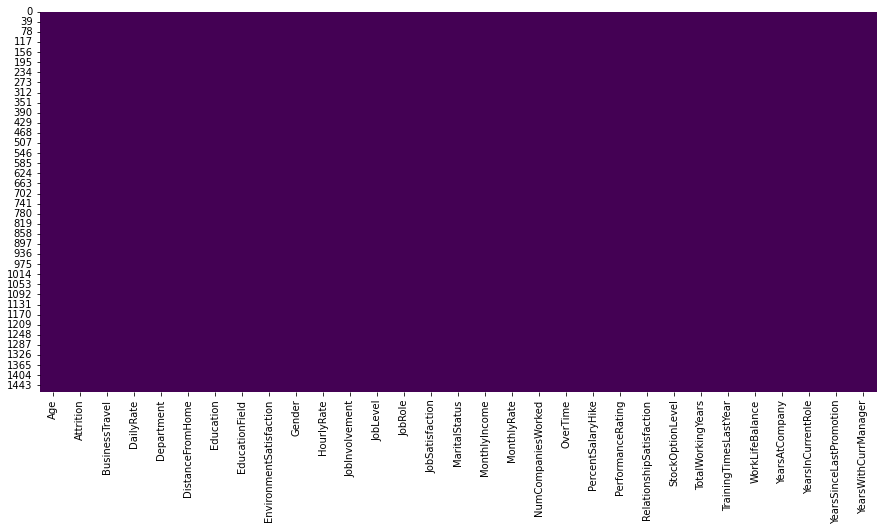

In [10]:
plt.subplots(figsize= (15,7))
sns.heatmap(emp_df.isnull(), cbar= False, cmap= "viridis")
plt.show()

In [11]:
emp_df.isnull().sum().sort_values()

Age                         0
YearsInCurrentRole          0
YearsAtCompany              0
WorkLifeBalance             0
TrainingTimesLastYear       0
TotalWorkingYears           0
StockOptionLevel            0
RelationshipSatisfaction    0
PerformanceRating           0
PercentSalaryHike           0
OverTime                    0
NumCompaniesWorked          0
MonthlyRate                 0
MonthlyIncome               0
YearsSinceLastPromotion     0
MaritalStatus               0
JobRole                     0
JobLevel                    0
JobInvolvement              0
HourlyRate                  0
Gender                      0
EnvironmentSatisfaction     0
EducationField              0
Education                   0
DistanceFromHome            0
Department                  0
DailyRate                   0
BusinessTravel              0
Attrition                   0
JobSatisfaction             0
YearsWithCurrManager        0
dtype: int64

### Dividing Variables into Catagorical and Continuous Variables

In [12]:
catagorical = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction',
               'Gender', 'JobInvolvement', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
               'WorkLifeBalance', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime']
continuous = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

### Machine learning Model

In [13]:
def ML_model():
    X = emp_df[continuous].to_numpy()
    y = emp_df['Attrition']
    y.replace({'No': 0, 'Yes': 1}, inplace=True)
    y.to_numpy()

    print("Dividing the model into Train and Test datasets.\n\n")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y)

    logreg = LogisticRegression(penalty = 'none', max_iter = 10000) # Instantiating logistic regression 
    print("Fitting the model!!\n\n")
    logreg.fit(X_train, y_train)  # Fitting the train data to 'logreg'

    print("Starting the predictions\n\n")
    # Predicted class for the test subset through logistic regression 
    y_train_pred_prob = logreg.predict_proba(X_train)  # Calculating probabilities of the two classes in train subset
    y_test_pred_prob = logreg.predict_proba(X_test)    # Calculating probabilities of the two classes in test subset

    y_train_pred = y_train_pred_prob.argmax(axis=1)  # Finding the predicted class for train predictions
    y_test_pred = y_test_pred_prob.argmax(axis=1)  # Finding the predicted class for test predictions

    # Calculating the train and test accuracy scores of the model

    from sklearn import metrics    # Importing 'metrics' from sklearn

    train_score = metrics.accuracy_score(y_train, y_train_pred) # train accuracy

    test_score = metrics.accuracy_score(y_test, y_test_pred)    # test accuracy
    print("Results\n")
    print('Train accuracy score of the model is ', round(train_score, 5),'\n')
    print('Test accuracy score of the model is ', round(test_score, 5))

### Emp_Data class

In [14]:
class Emp_Data:
    def __init__(self):
        self.grid_button = Button(description='Show in Grid')
        self.univariate_button = Button(description='Univariate Plots')
        self.multivariate_button = Button(description='Analysis Plots')
        self.machinelearning_button = Button(description='Machine Learning')
        self.grid_button.on_click(self.on_grid)
        self.univariate_button.on_click(self.on_univariate)
        self.multivariate_button.on_click(self.on_multivariate)
        self.machinelearning_button.on_click(self.on_machinelearning)
        self.output = Output()
        self.container = VBox([HBox([self.grid_button, self.univariate_button, self.multivariate_button,
                               self.machinelearning_button]), self.output])
    
    def on_grid(self, btn):
        self.output.clear_output()
        with self.output:
            display(emp_df)
        
    def on_univariate(self, btn):
        self.output.clear_output()
        cat_feature_variables = catagorical
        con_feature_variables= continuous
        menu= Dropdown(description='Catagory', options=['Catagorical Variables', 'Continuous Variables'])
        radio_menu1 = RadioButtons(description='x', options=cat_feature_variables)
        radio_menu2 = RadioButtons(description='x', options=con_feature_variables)
        
        def count_plot(val=radio_menu1):
            with self.output:
                plt.figure(figsize=(15,7))
                sns.countplot(data= emp_df, x= radio_menu1.value)
                plt.xticks(rotation=30)
        def kde_plot(val=radio_menu2):
            with self.output:
                plt.figure(figsize=(15,7))
                sns.kdeplot(data= emp_df, x= radio_menu2.value)
        def choose(option=menu):
            if menu.value == 'Catagorical Variables':
                widgets.interact(count_plot, val=radio_menu1)
            else:
                widgets.interact(kde_plot, val=radio_menu2)

        widgets.interact(choose, option=menu)
        self.output.clear_output()
            
    def on_multivariate(self, btn):
        self.output.clear_output()
        with self.output:
            plt.subplots(figsize= (20,7))
            sns.histplot(data= emp_df, x='Gender', hue='BusinessTravel', multiple='dodge')
            plt.show()
            plt.subplots(figsize= (20,7))
            sns.histplot(data= emp_df, x='Age', hue='Attrition', multiple='dodge')
            plt.show()
            plt.subplots(figsize= (20,7))
            sns.histplot(data= emp_df, x='PercentSalaryHike', hue='Attrition', multiple='dodge')
            plt.show()

    def on_machinelearning(self, btn):
        self.output.clear_output()
        with self.output:
            ML_model()

    def get_layout(self):
        self.output.clear_output()
        return self.container

Emp_Data().get_layout()

In [15]:
slider_range = widgets.IntSlider(value=20, min=0, max=100000, description='Slider')
colors = ['#3742fa', '#FDB927']
cols = continuous

features= Dropdown(description='Features', options=cols)
out = Output()
def plot_stats_pie(min_value, col):
    out.clear_output()
    with out:
        num_above = len(emp_df.loc[(emp_df[col] >= min_value)])
        num_below = len(emp_df.loc[(emp_df[col] < min_value)])
        num = num_above + num_below

        nums = [num_above, num_below]
        labels = ["Above", "Below"]

        print(f"{num}\tTotal Employees")
        print(f"{num_above}\tNo. of Employees Above")
        print(f"{num_below}\tNo. of Employees Below")

        fig = plt.figure(figsize=(8,8))
        plt.subplot(1,1,1)
        plt.pie(nums, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.title("Employees With {} >= {}".format(col, min_value))
        plt.show()

interact(plot_stats_pie, min_value=slider_range, col=features)
out

interactive(children=(IntSlider(value=20, description='Slider', max=100000), Dropdown(description='Features', …

Output()